In [155]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib.ticker import MultipleLocator, PercentFormatter
from PIL import Image

# Put at top of plotting script (requires tex be installed though)
matplotlib.rc('font', family='serif', size=20)
matplotlib.rc('text', usetex=True)


def adjust(fig, left=0.0, right=1.0, bottom=0.0, top=1.0, wspace=0.0, hspace=0.0):
    fig.subplots_adjust(
        left   = left,  # the left side of the subplots of the figure
        right  = right,  # the right side of the subplots of the figure
        bottom = bottom,  # the bottom of the subplots of the figure
        top    = top,  # the top of the subplots of the figure
        wspace = wspace,  # the amount of width reserved for blank space between subplots
        hspace = hspace,  # the amount of height reserved for white space between subplots
    )
    

def save_fig(fig, path, **kwargs):
    import os
    os.makedirs(path.rpartition("/")[0], exist_ok=True)
    fig.savefig(f"{path}", bbox_inches="tight", **kwargs)


# Axes formatting
from matplotlib.ticker import MultipleLocator, PercentFormatter


# Accessibility
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler(color=sns.color_palette("colorblind"))

# Composite plots 
def disable_axis(ax):
    ax.set_zorder(-100)  # Avoids a visual rendering bug
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    plt.setp(ax.spines.values(), color=None)


import json
import numpy as np
import pandas as pd

In [156]:
# load metrics 

with open("./camera_ready/landing-page/all_datasets.json") as f:
    METRICS = json.load(f)



MODELS_NAMES = {
    "gpt-j-6b": "GPT-J",
    "pythia-12b": "Pythia 12B",
    "opt-6.7b": "OPT 6.7B",
    "OLMo-7B": "OLMo 7B",
    "Mixtral-8x7B-v0.1": "Mixtral MoE",
    "llama-2-70b": "Llama 2",
    "mpt-30b": "MPT 30B",
}


## Plots for the presentation


In [150]:
def plot_barplot_w_std(metrics, dataset, filtering, models_for_analysis, path, figsize=(6, 4), dpi=200, palette="colorblind"):
    dataset_metrics = metrics[dataset][filtering]
    
    models_names = [MODELS_NAMES[m] for m in models_for_analysis] # rename operation
    values_avg = [dataset_metrics["neutral__avg"][m] for m in models_for_analysis]
    values_std = [2*dataset_metrics["neutral__std"][m] for m in models_for_analysis]

    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    plt.errorbar(x=models_names, y=values_avg, yerr=values_std, ecolor='black', elinewidth=1, capsize=2, capthick=1,  linestyle='')
    sns.barplot(x=models_names, y=values_avg, hue=models_names, legend=True)
    ax.spines[['right', 'top']].set_visible(False)
    
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    ax.yaxis.set_minor_locator(MultipleLocator(25))
    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.yaxis.set_major_formatter(PercentFormatter(100.0))  # 100.0 is to be treated as 100%
    ax.set_ylabel("Fairness score")
    ax.set_ylim(0, 55)
    
    ax.grid(axis='y', which="minor", linewidth=1, linestyle='--', color="lightgray")
    ax.grid(axis='y', which="major", linewidth=1, linestyle='--', color="gray")
    ax.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 0.8), fontsize=10)
    ax.set_title(f"{dataset} ($\eta = {filtering}$)")

    adjust(fig)
    save_fig(fig, path)


def plot_male_to_female_proportion(metrics, dataset, filtering, models_for_analysis, path, figsize=(6, 4), dpi=200, palette="colorblind"):
    dataset_metrics = metrics[dataset][filtering]
     
    models_names = [MODELS_NAMES[m] for m in models_for_analysis] # rename operation
    proportions = [dataset_metrics["male_rel_ratio"][m] for m in models_for_analysis]
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    sns.barplot(x=models_names, y=proportions, hue=models_names, legend=True, ax=ax)
    ax.spines[['right', 'top']].set_visible(False)
    
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.50))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 is to be treated as 100%
    ax.set_ylabel("\% of male preference")
    ax.set_ylim(0, 1)
    
    ax.grid(axis='y', which="minor", linewidth=1, linestyle='--', color="lightgray")
    ax.grid(axis='y', which="major", linewidth=1, linestyle='--', color="gray")
    ax.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 0.8), fontsize=15)
    ax.set_title(f"{dataset} ($\eta = {filtering}$)")
    
    adjust(fig)
    save_fig(fig, path)



MODELS_FOR_ANALYSIS = [
    "gpt-j-6b",
    "pythia-12b",
    "opt-6.7b",
    "OLMo-7B",
    "Mixtral-8x7B-v0.1",
    "llama-2-70b",
    "mpt-30b",
]

### Plot 1. Barplots with fairness scores (and confidence intervals)

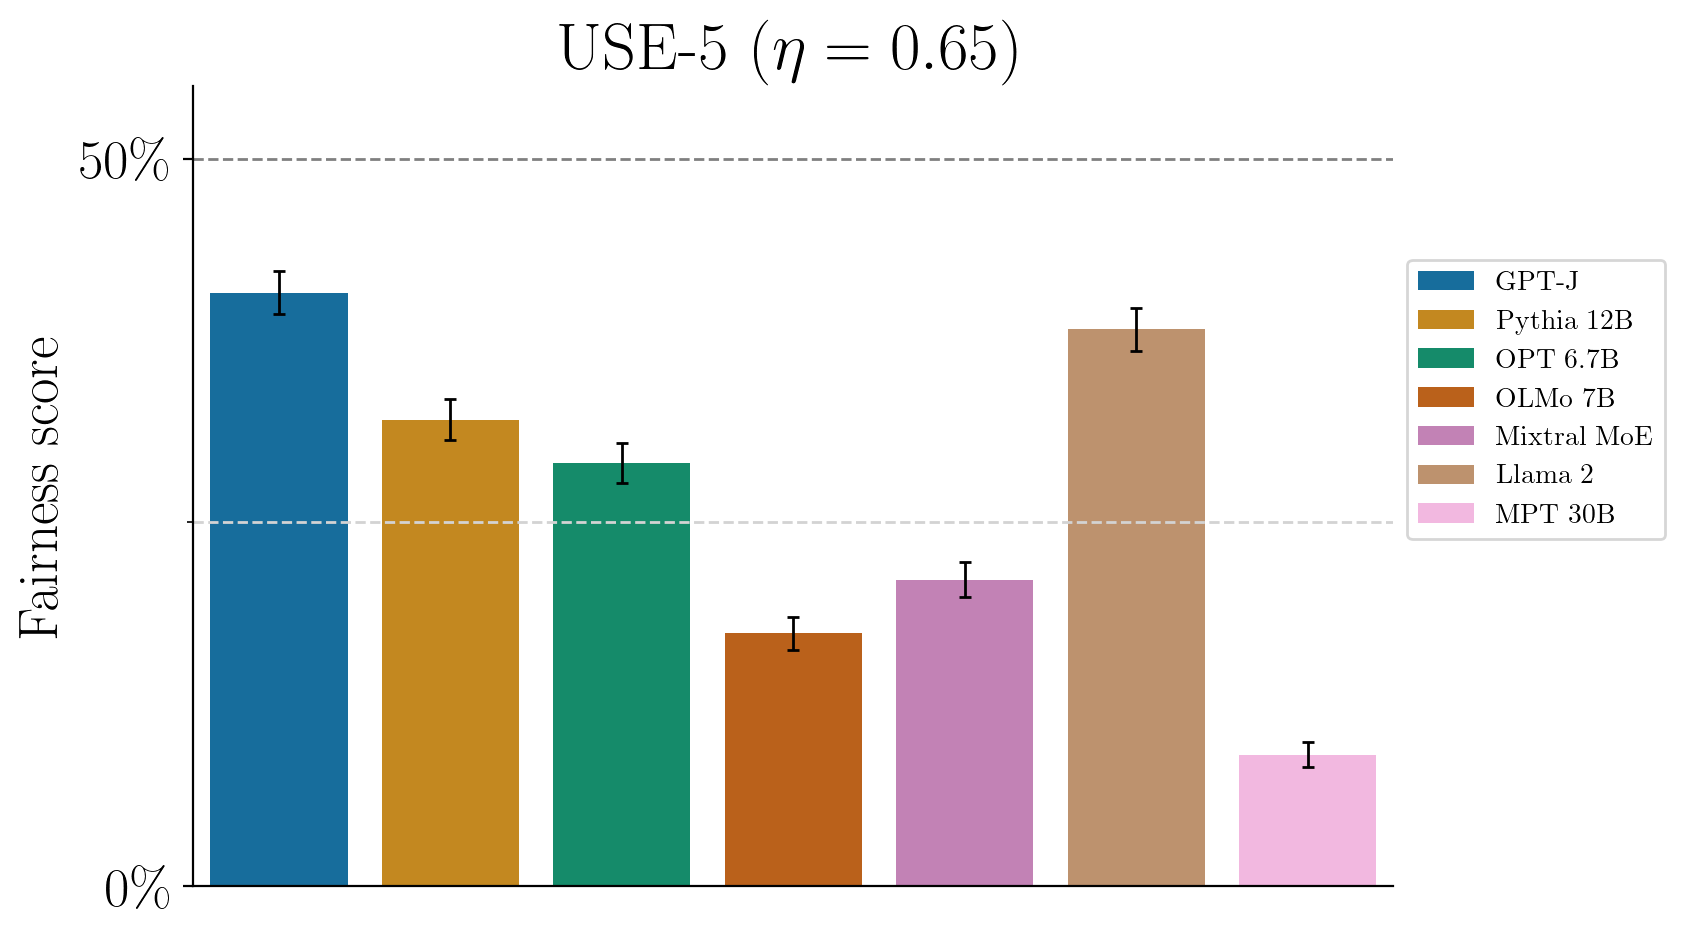

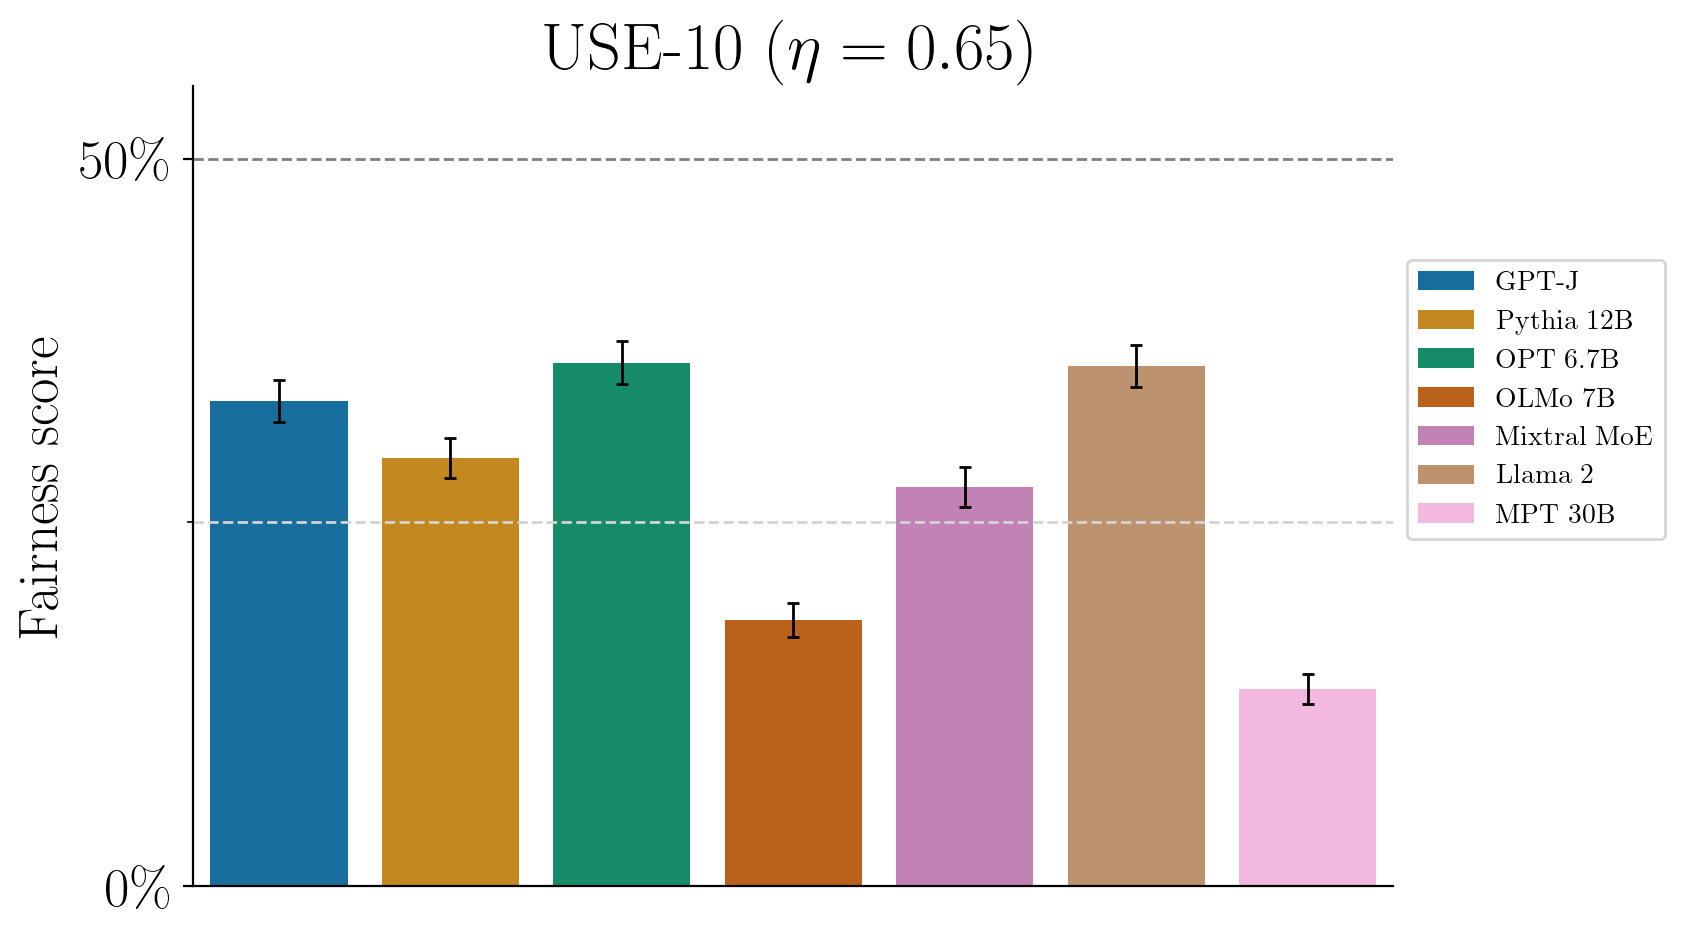

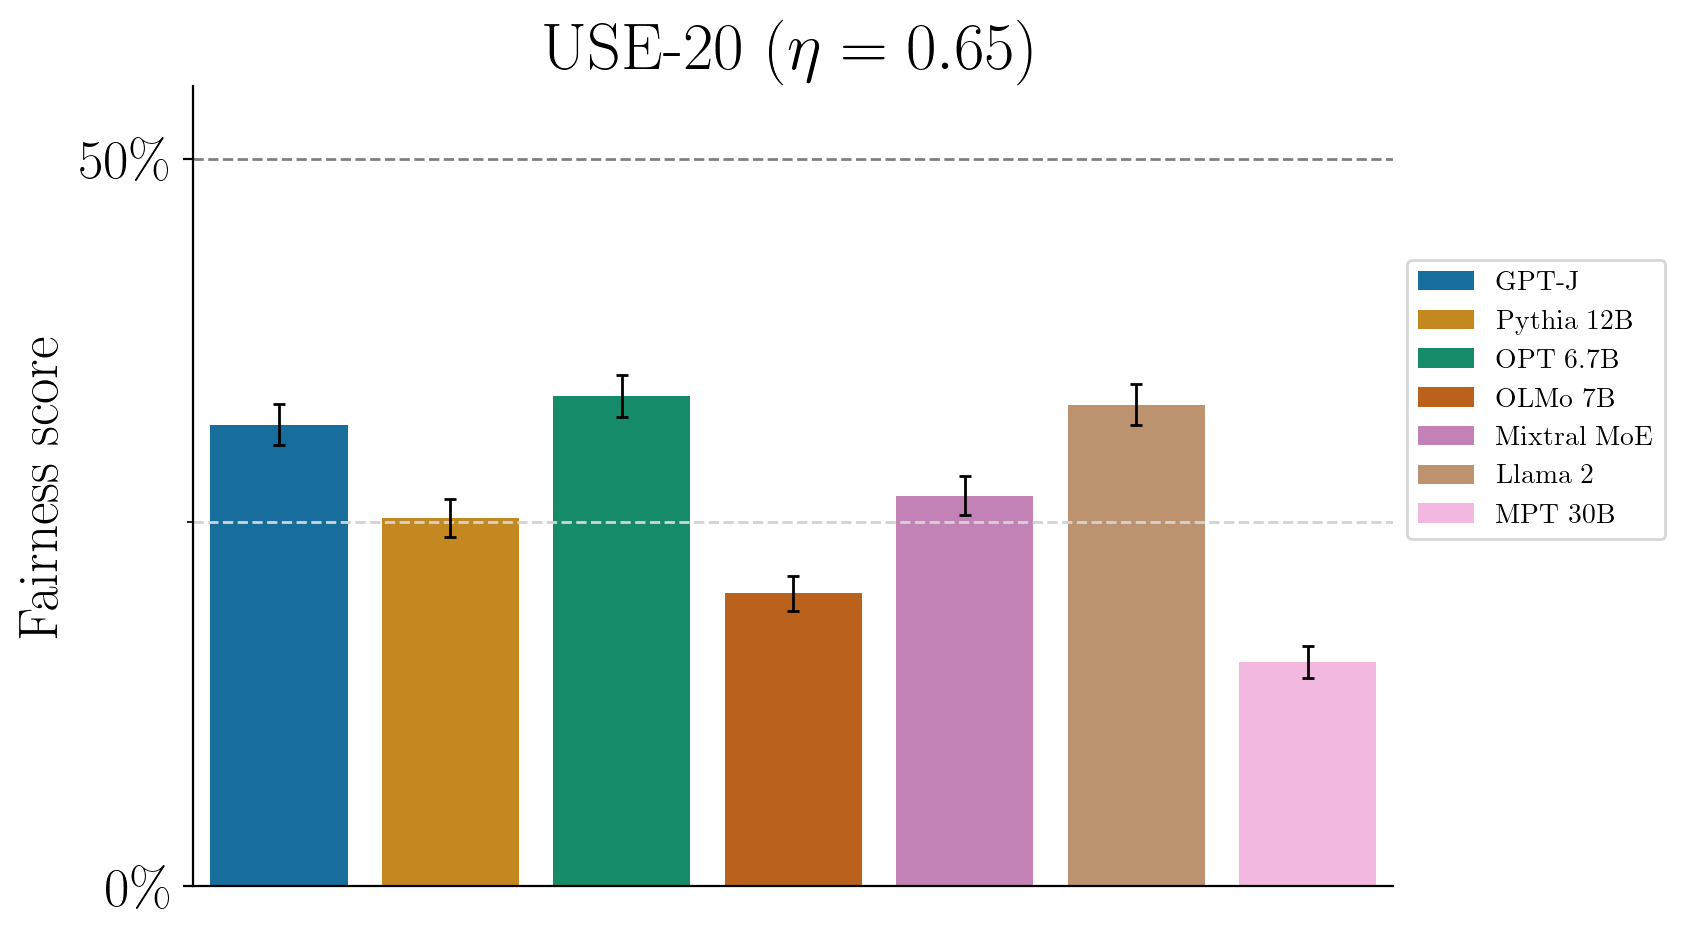

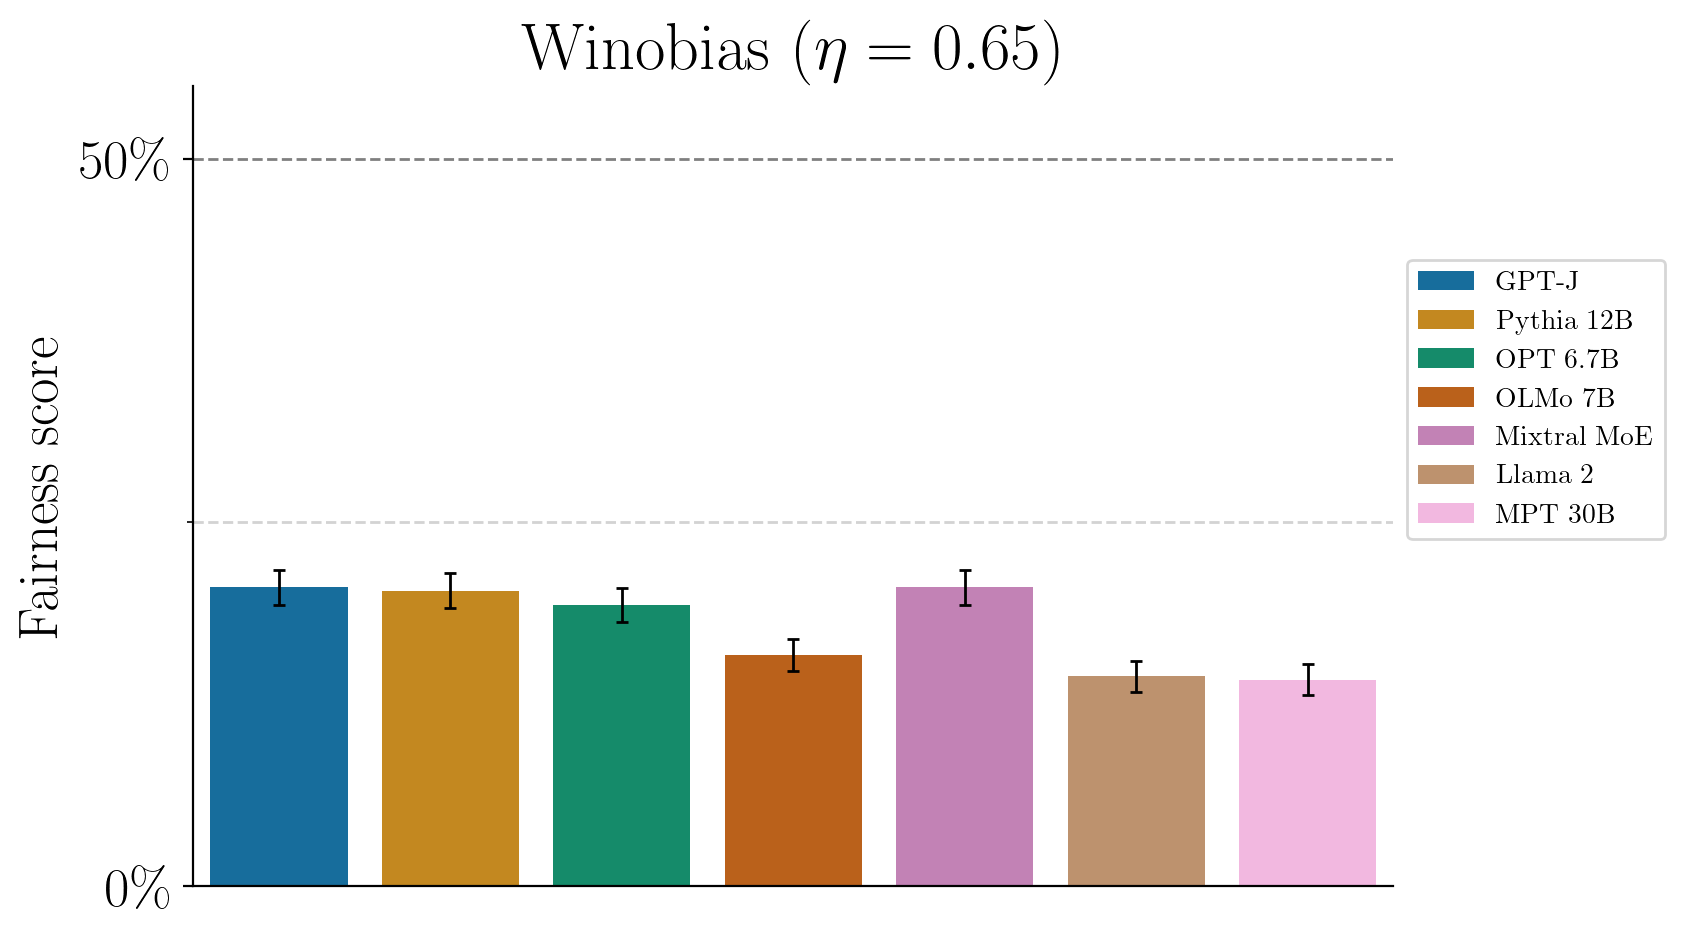

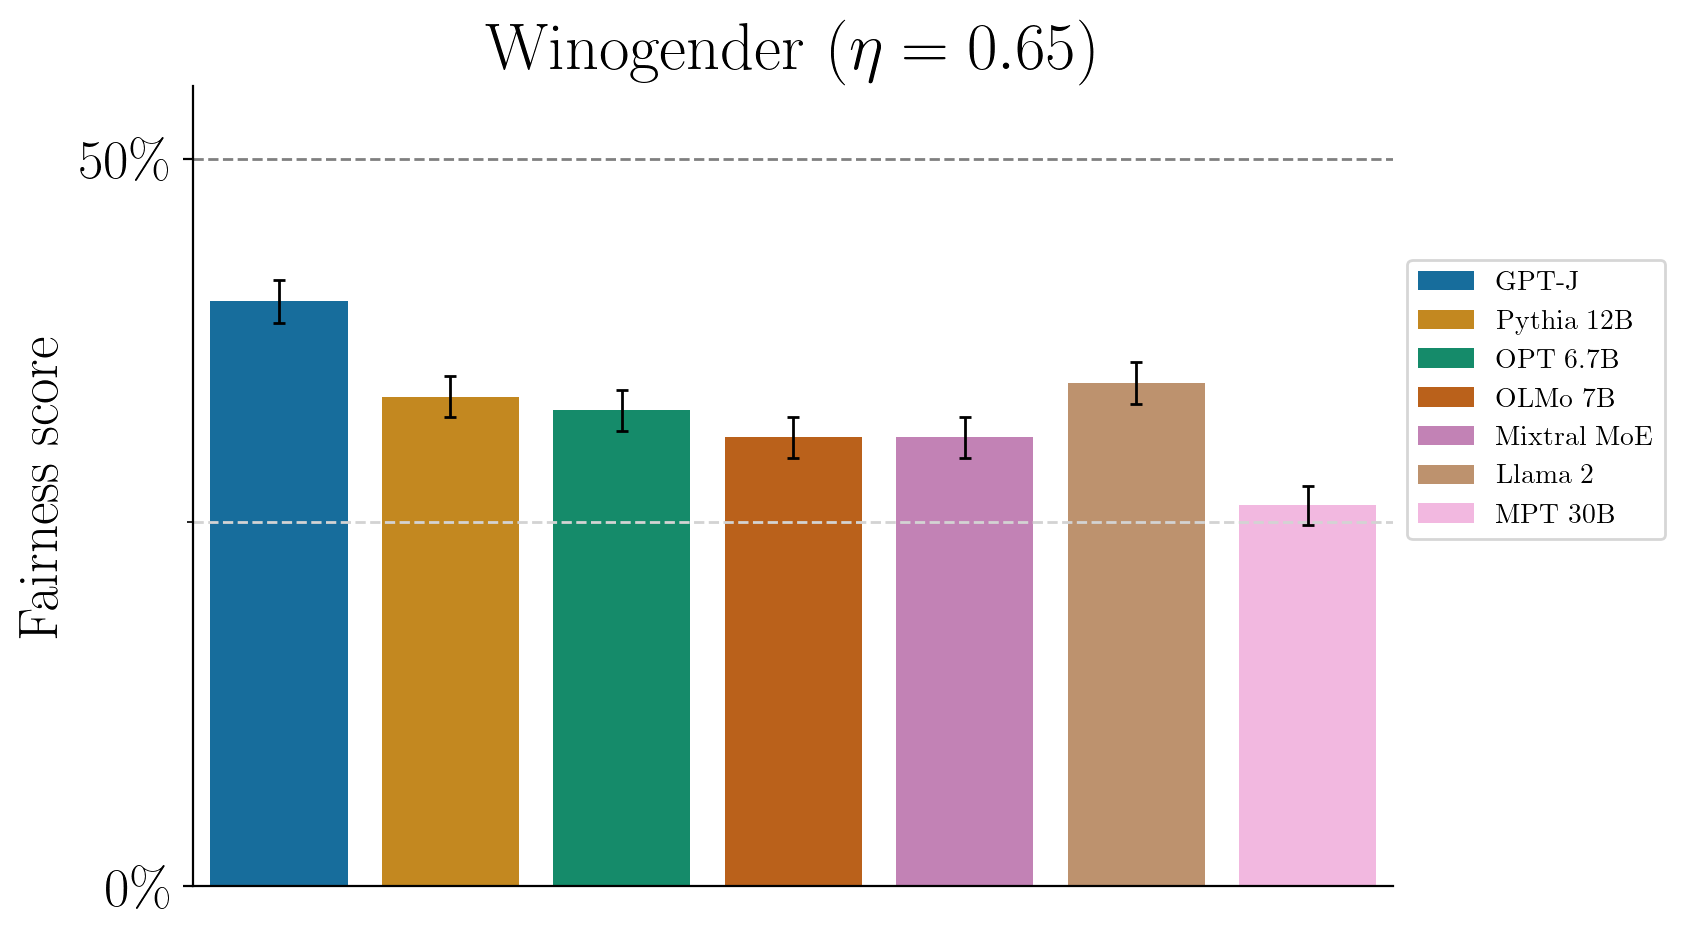

In [169]:
eta, ext = "0.65", ".png"
plot_barplot_w_std(
    METRICS, "USE-5", eta, MODELS_FOR_ANALYSIS, f"./presentation/fairness-us/USE-5__eta-{eta}{ext}"
)

plot_barplot_w_std(
    METRICS, "USE-10", eta, MODELS_FOR_ANALYSIS, f"./presentation/fairness-us/USE-10__eta-{eta}{ext}"
)

plot_barplot_w_std(
    METRICS, "USE-20", eta, MODELS_FOR_ANALYSIS, f"./presentation/fairness-us/USE-20__eta-{eta}{ext}"
)


plot_barplot_w_std(
    METRICS, "Winobias", eta, MODELS_FOR_ANALYSIS, f"./presentation/fairness-us/WB__eta-{eta}{ext}"
)


plot_barplot_w_std(
    METRICS, "Winogender", eta, MODELS_FOR_ANALYSIS, f"./presentation/fairness-us/WG__eta-{eta}{ext}"
)

### Plot 2. Barplots with preference disparity (and confidence intervals, using bootstrap sampling)

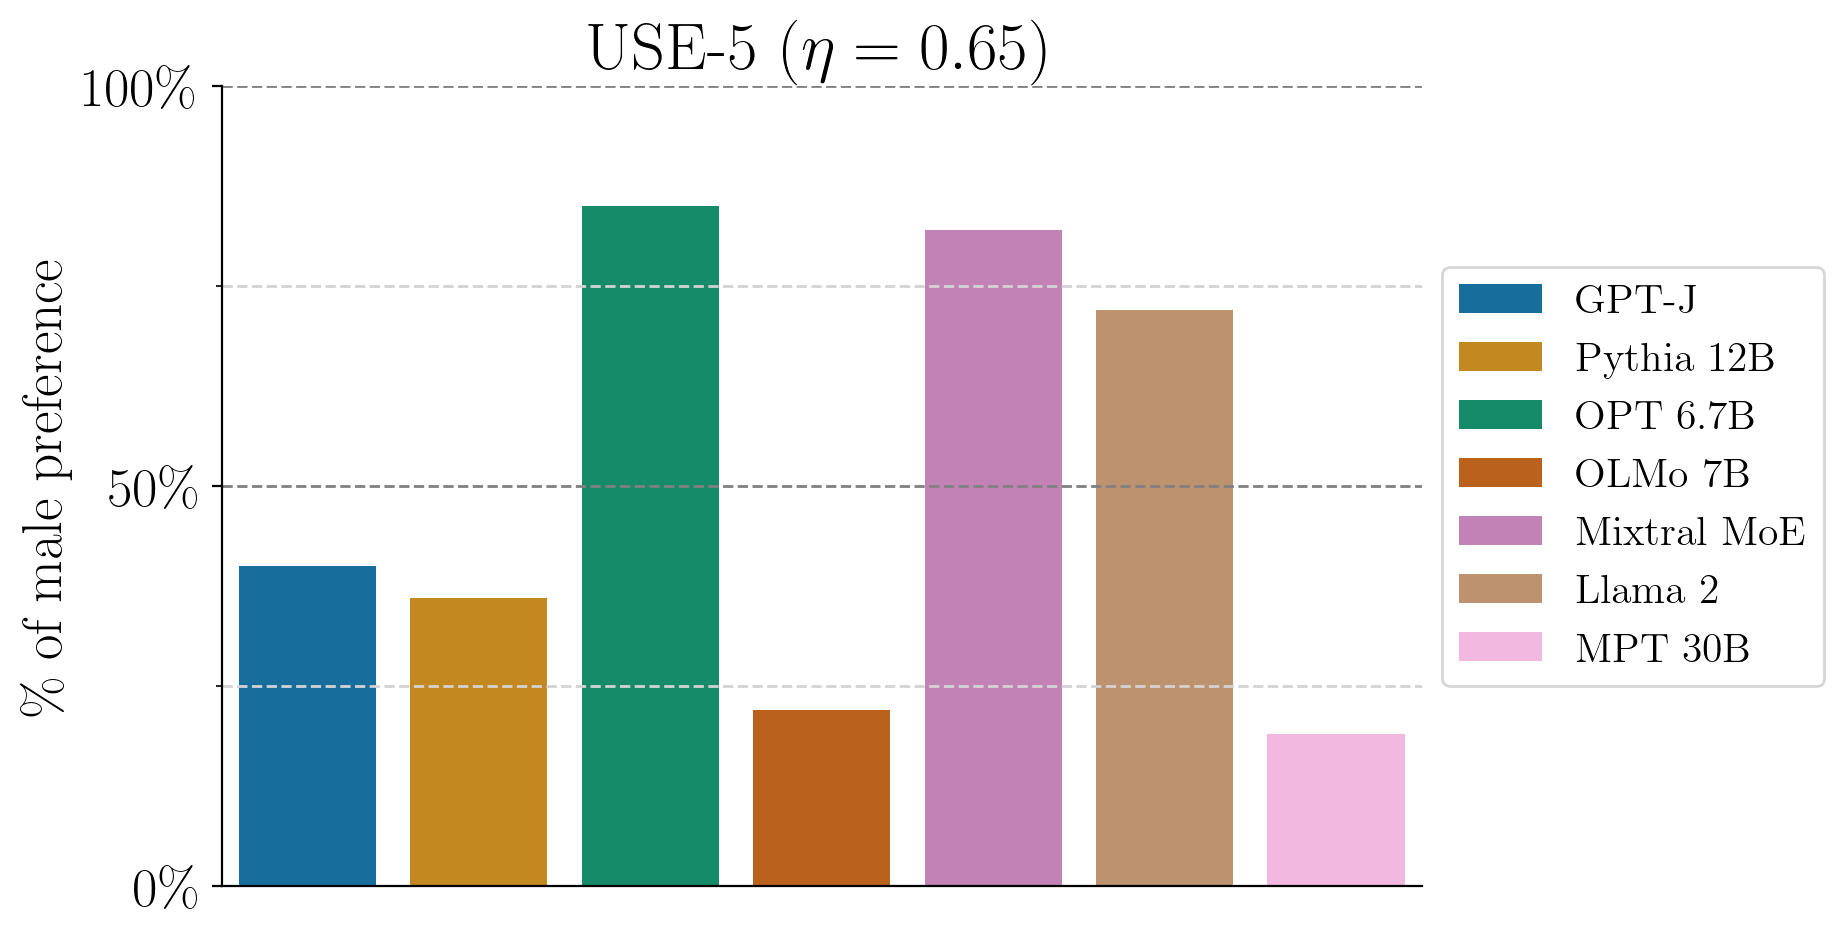

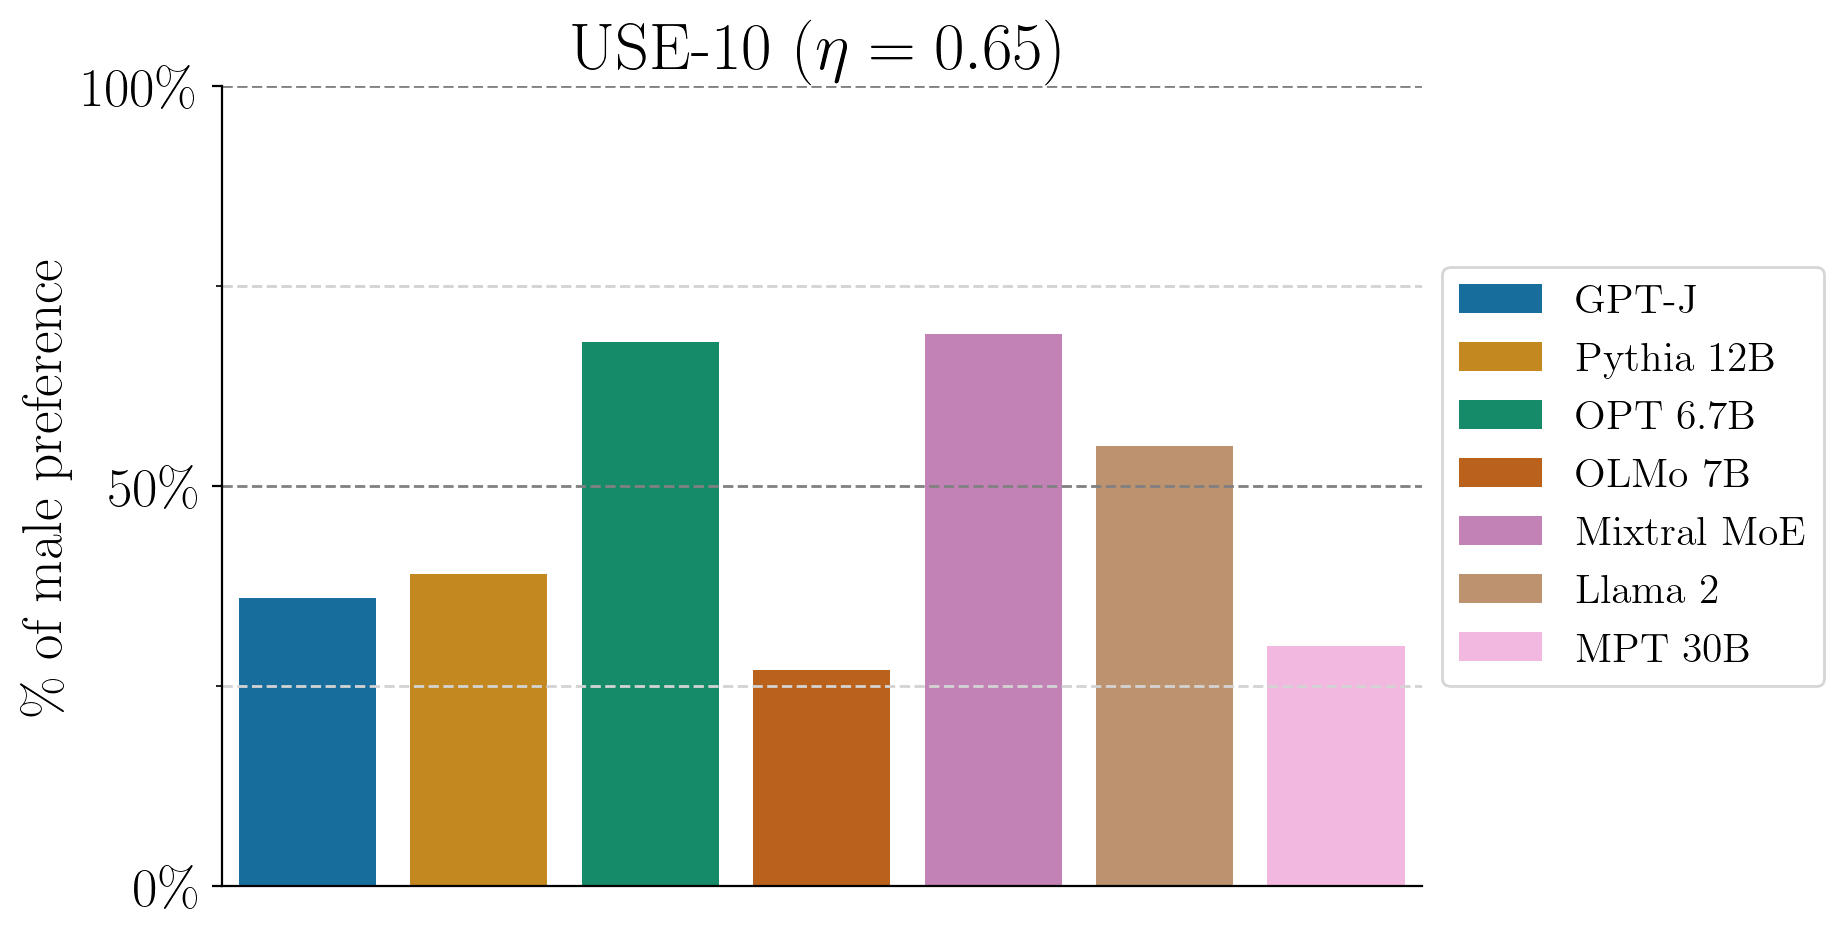

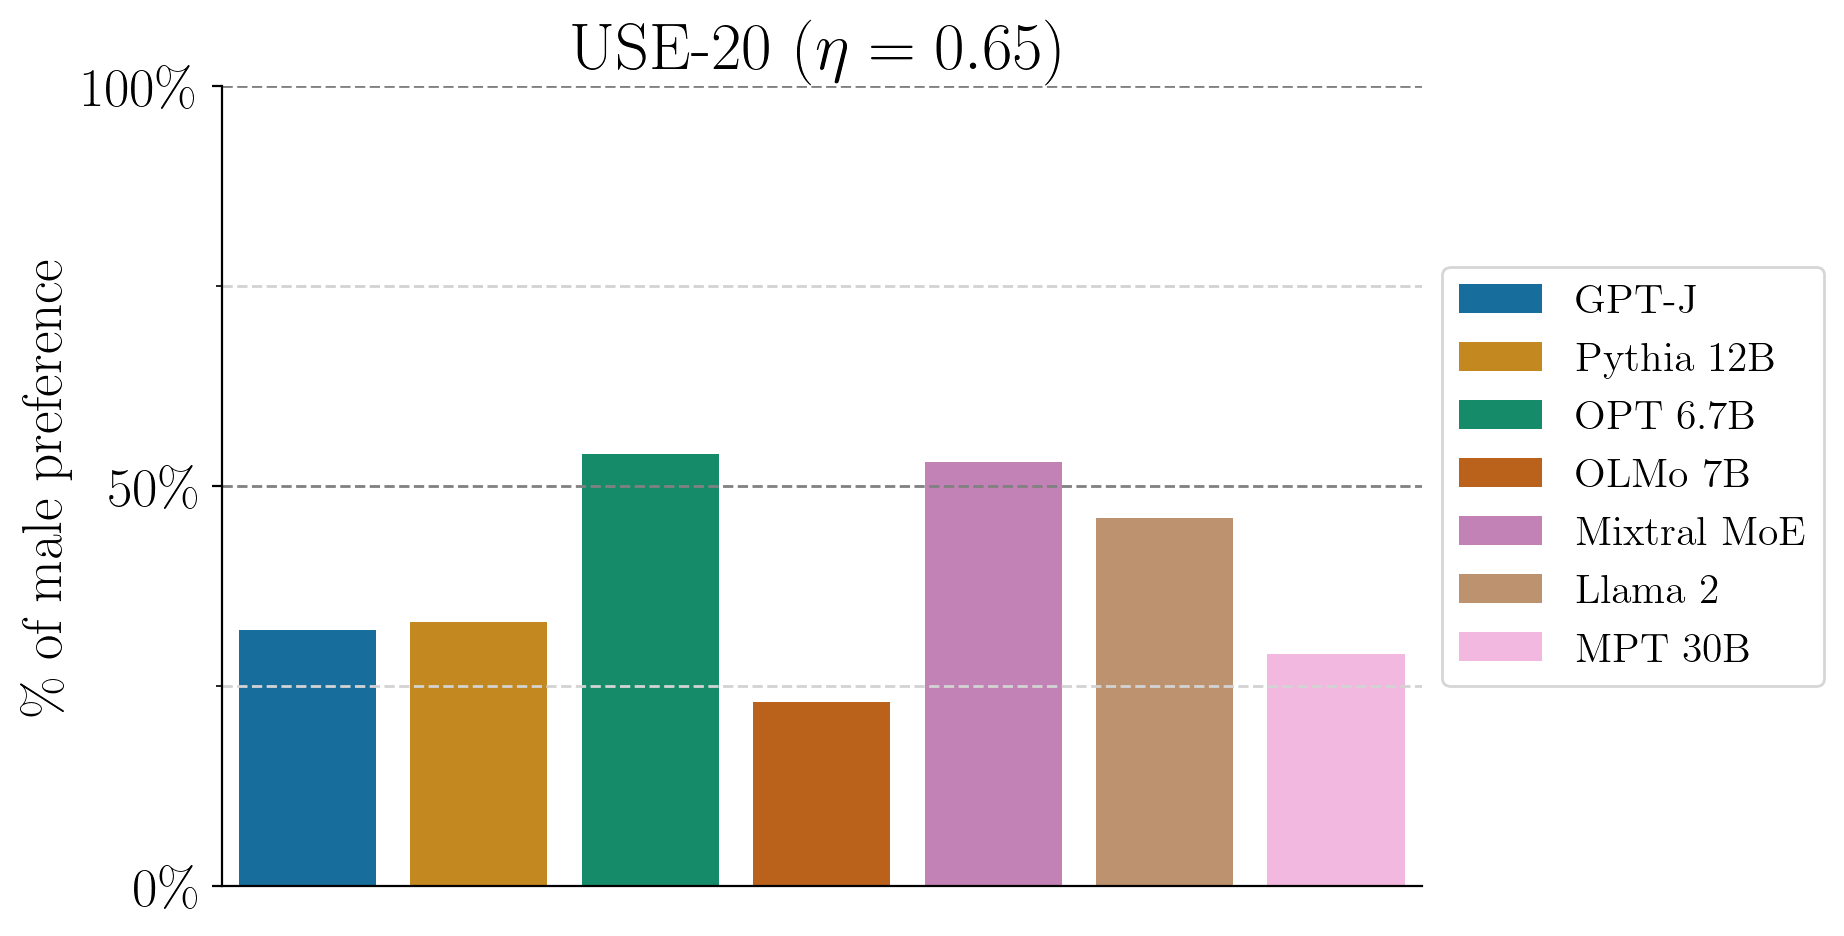

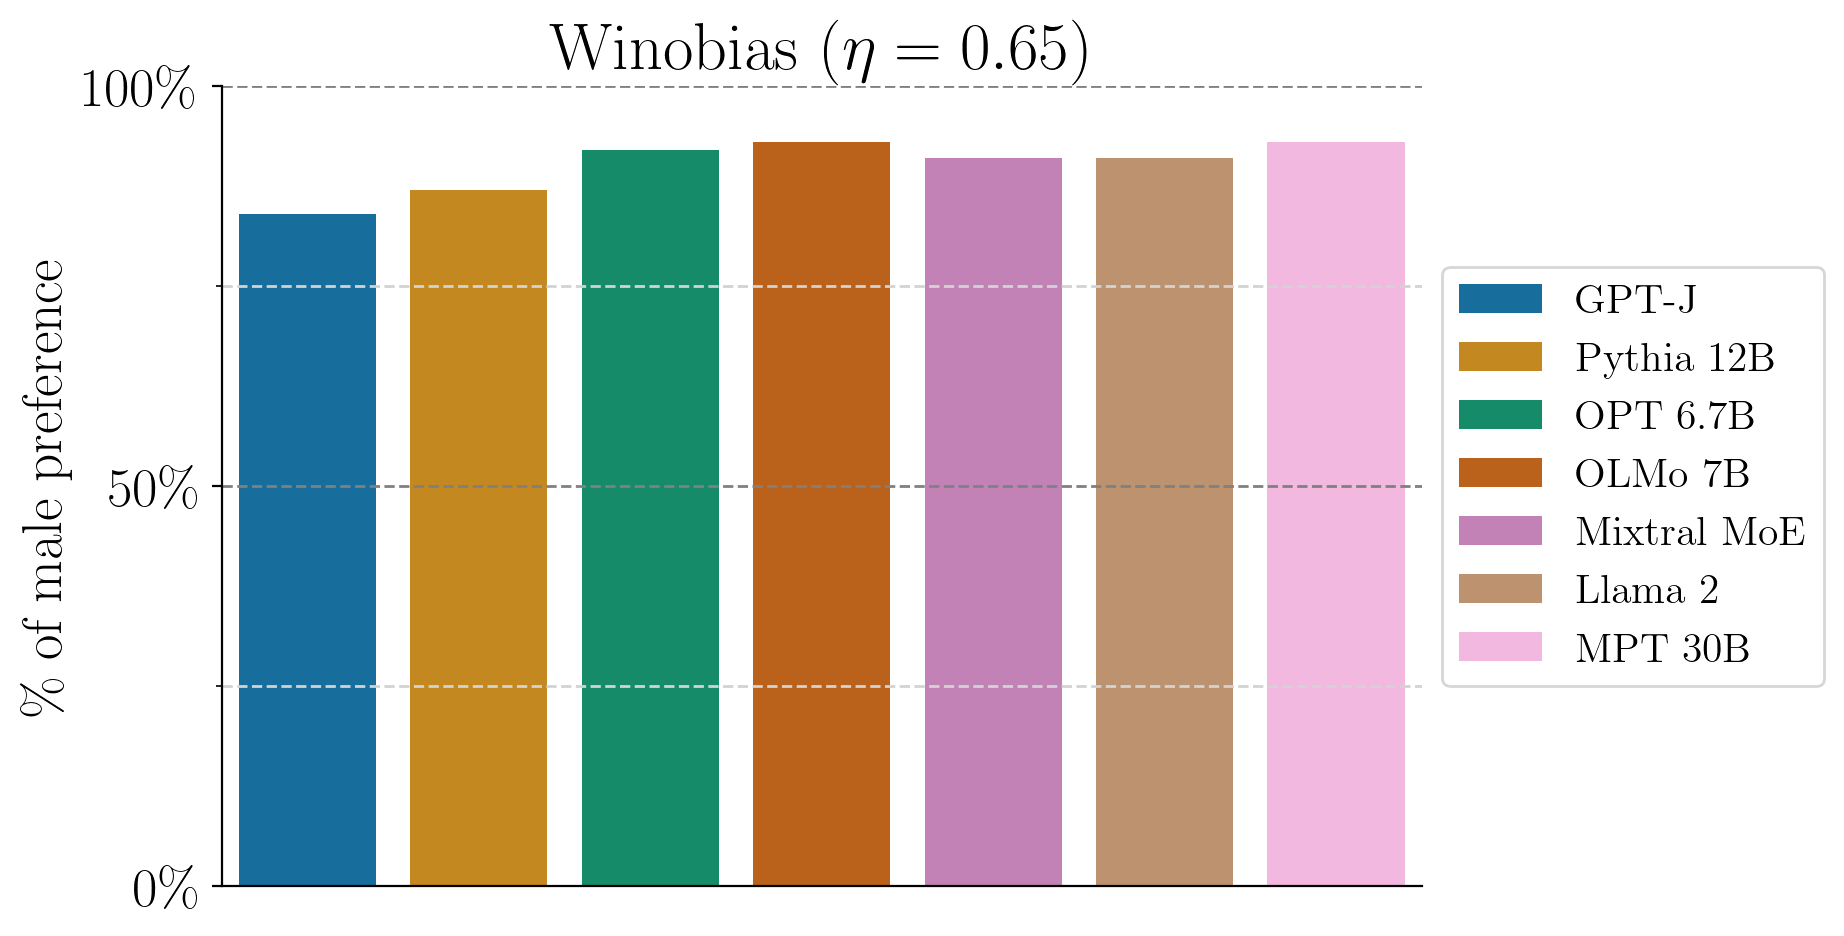

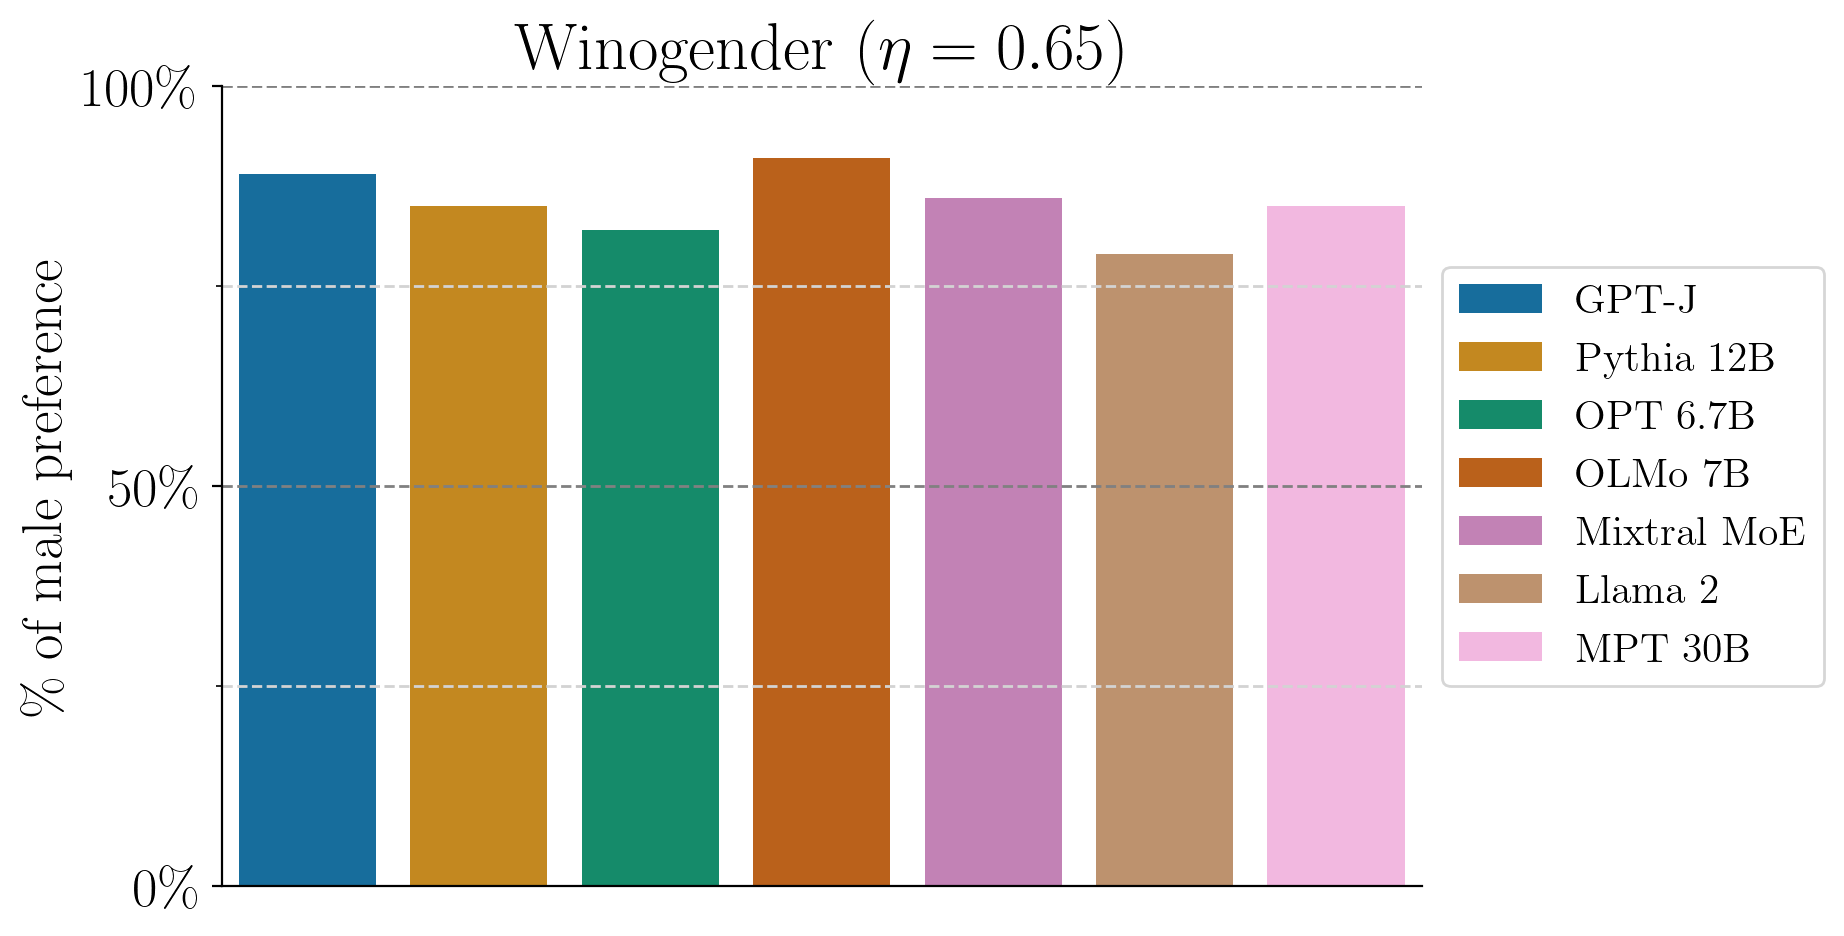

In [168]:
eta, ext = "0.65", ".png"
plot_male_to_female_proportion(
    METRICS, "USE-5", eta, MODELS_FOR_ANALYSIS, f"./presentation/proportions/USE-5__eta-{eta}{ext}"
)

plot_male_to_female_proportion(
    METRICS, "USE-10", eta, MODELS_FOR_ANALYSIS, f"./presentation/proportions/USE-10__eta-{eta}{ext}"
)

plot_male_to_female_proportion(
    METRICS, "USE-20", eta, MODELS_FOR_ANALYSIS, f"./presentation/proportions/USE-20__eta-{eta}{ext}"
)


plot_male_to_female_proportion(
    METRICS, "Winobias", eta, MODELS_FOR_ANALYSIS, f"./presentation/proportions/WB__eta-{eta}{ext}"
)


plot_male_to_female_proportion(
    METRICS, "Winogender", eta, MODELS_FOR_ANALYSIS, f"./presentation/proportions/WG__eta-{eta}{ext}"
)

# Landing page plots